In [1]:
import tensorflow as tf


In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Loading Model

In [9]:
model= tf.keras.models.load_model('trained_model.keras')

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

Visualising and Performing Prediction on Single image

In [11]:
!pip install opencv-python

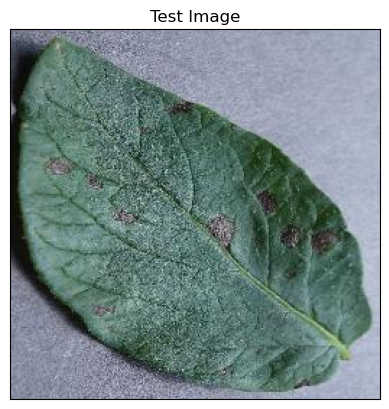

In [12]:
#Test Image Visualization
import cv2
image_path = "test/test/PotatoEarlyBlight3.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [14]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 303ms/step


(array([[6.92915783e-05, 2.36443150e-08, 9.61495289e-07, 8.40665221e-01,
         4.03172271e-06, 1.24594546e-03, 2.26043885e-05, 4.86835233e-07,
         1.67010668e-07, 4.64546787e-07, 7.82875723e-05, 3.64698565e-07,
         1.26498875e-07, 3.49333192e-07, 4.09881125e-08, 6.32783667e-06,
         1.01555418e-06, 1.05970805e-07, 3.40670425e-08, 3.01322783e-04,
         5.85991307e-04, 1.33677953e-04, 1.15965270e-01, 4.35268666e-05,
         4.08205949e-02, 2.67736323e-05, 3.10919610e-08, 3.85937756e-06,
         1.61204696e-06, 8.13289034e-07, 1.48433328e-05, 1.78800508e-06,
         2.13564263e-07, 9.60374109e-08, 7.10885672e-07, 1.80395006e-07,
         6.05540151e-07, 2.28229192e-06]], dtype=float32),
 (1, 38))

In [15]:
result_index = np.argmax(prediction)
result_index

3

In [16]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

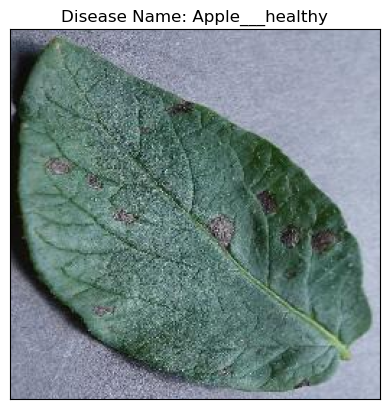

In [17]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()